In [1]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import re                                #正则表达式，可用于匹配中文文本
import collections
import matplotlib.pyplot as plt

df = pd.read_csv("一级评论3.csv", encoding='utf-8') 


print(df.head())
print(len(df))



                                             content
0                      这教授还自以为他很自豪的感觉，难道是救世主能为全人类负责？
1                                           对所有人类负责？
2  7对夫妇，不止这两个孩子吧！别人的人生，别人的苦难，你怎么负责怎么替代？看看网上的那份协议书...
3  我倒是很期待这个项目有多成功，会给人类带来多大的改变，奈何这个负责人太急功近利，没有几代的实...
4  贺所谓的负责，是把这两个孩子一直作为实验对象和个人资产，好后续持续跟踪、观察、做试验以不断获...
1202


In [2]:
df = df.dropna() #去除空值所在的整条(行)数据
print(len(df))

1202


In [3]:
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords


In [4]:
# 对句子去除停用词
def movestopwords(sentence):
    stopwords = stopwordslist('scu_stopwords.txt')
    outstr = ''
    for word in sentence:
        if word not in stopwords:
            if word != '\t'and'\n':
                outstr += word # outstr += " "
    return outstr


In [5]:
# 分词函数
def chinese_word_cut(mytext):
    import jieba.posseg as psg
    checkarr = ['n']
    returnmsg = "".join([(x.word) for x in psg.cut(mytext) if (x.flag in checkarr)])
    return returnmsg



In [6]:
 # 分词结果  
df = df.content.apply(chinese_word_cut)
ff = df.apply(movestopwords)
ff = ff.dropna()

print(ff) #预览

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.720 seconds.
Prefix dict has been built succesfully.


0               教授自豪感觉救世主全人类
1                         人类
2          夫妇孩子人生替代协议书科学底线人信
3       项目人类负责人风险人类强子对撞机产生地球
4               孩子对象个人资产研究进展
                ...         
1197                     全人类
1198                      责任
1199                      孩子
1200                        
1201                        
Name: content, Length: 1202, dtype: object


In [7]:
word_counts = collections.Counter(ff) # 对分词做词频统计

word_counts_top10 = word_counts.most_common(11) # 获取前11最高频的词

word_counts_top10 = word_counts_top10[1:10]
print (word_counts_top10) 

[('人', 25), ('人类', 16), ('孩子', 16), ('责任', 12), ('全人类', 10), ('责', 9), ('人生', 7), ('国家', 7), ('监狱', 6)]


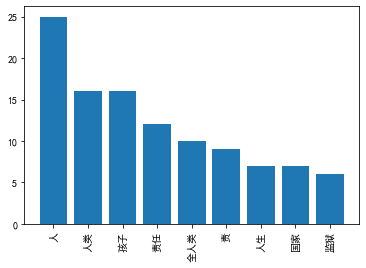

In [8]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

wa=dict(word_counts_top10)
plt.bar(wa.keys(),wa.values())
plt.xticks(rotation=90)
plt.show()

In [9]:
#从文件导入停用词表
stpwrdpath = "scu_stopwords.txt"
stpwrd_dic = open(stpwrdpath, 'rb')
stpwrd_content = stpwrd_dic.read().decode('utf-8')#将停用词表转换为list
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()



In [10]:
# 调用sklearn机器学习包进行向量化
n_features = 1000 # 指定特征关键词提取最大值
tf_vectorizer = CountVectorizer(strip_accents='unicode',# 去除raw document中的重音符号
    max_features=n_features,#stop_words='english', # 停用词
    stop_words=stpwrdlst,
    max_df=0.5, # 阈值如果某个词的document frequence大于max_df，不当作关键词.float，词出现的次数与语料库文档数的百分比，int出现次数
    min_df=3) # 如果某个词的document frequence小于min_df，则这个词不会被当作关键词


tf = tf_vectorizer.fit_transform(df)
print(tf)
print('\nvocabulary list:\n\n',tf_vectorizer.get_feature_names())
print( '\nvocabulary dic :\n\n',tf_vectorizer.vocabulary_)

  (1, 4)	1
  (13, 10)	1
  (17, 10)	1
  (18, 0)	1
  (22, 9)	1
  (33, 3)	1
  (62, 14)	1
  (65, 14)	1
  (72, 15)	1
  (73, 15)	1
  (93, 10)	1
  (95, 3)	1
  (126, 7)	1
  (136, 15)	1
  (141, 0)	1
  (144, 3)	1
  (154, 7)	1
  (159, 10)	1
  (166, 6)	1
  (205, 17)	1
  (212, 17)	1
  (248, 2)	1
  (251, 3)	1
  (253, 7)	1
  (260, 6)	1
  :	:
  (1026, 6)	1
  (1029, 10)	1
  (1037, 8)	1
  (1041, 15)	1
  (1050, 14)	1
  (1051, 17)	1
  (1054, 10)	1
  (1059, 10)	1
  (1076, 5)	1
  (1082, 18)	1
  (1094, 11)	1
  (1113, 5)	1
  (1118, 14)	1
  (1123, 8)	1
  (1129, 6)	1
  (1135, 13)	1
  (1136, 3)	1
  (1159, 15)	1
  (1160, 4)	1
  (1165, 4)	1
  (1178, 6)	1
  (1195, 6)	1
  (1197, 6)	1
  (1198, 15)	1
  (1199, 10)	1

vocabulary list:

 ['上帝', '事情', '人人生', '人生', '人类', '人类基因', '全人类', '国家', '垃圾', '基因', '孩子', '底线', '意思', '生子', '监狱', '责任', '资格', '资格能力', '问题']

vocabulary dic :

 {'人类': 4, '孩子': 10, '上帝': 0, '基因': 9, '人生': 3, '监狱': 14, '责任': 15, '国家': 7, '全人类': 6, '资格能力': 17, '人人生': 2, '意思': 12, '垃圾': 8, '生子': 13, '问题': 18, 

In [11]:
# LDA操作
n_topics = 5 # 人为指定划分的主题数
lda = LatentDirichletAllocation(n_topics,learning_method='online',max_iter=50,random_state=0 )
lda.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [12]:
# 显示主题关键词函数
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('\nTopic Nr.%d:' % int(topic_idx + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
n_top_words = 10 # 主题输出前20个关键词
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)





Topic Nr.1:
监狱 5.81 | 资格 3.93 | 资格能力 3.92 | 上帝 2.95 | 全人类 0.2 | 责任 0.2 | 国家 0.2 | 基因 0.2 | 人类 0.2 | 人生 0.2 | 

Topic Nr.2:
垃圾 5.91 | 问题 4.97 | 意思 3.94 | 底线 3.03 | 事情 3.01 | 人人生 2.94 | 全人类 0.2 | 国家 0.2 | 责任 0.2 | 基因 0.2 | 

Topic Nr.3:
孩子 16.78 | 人类基因 4.98 | 生子 3.03 | 全人类 0.2 | 责任 0.2 | 国家 0.2 | 基因 0.2 | 人类 0.2 | 人生 0.2 | 底线 0.2 | 

Topic Nr.4:
人类 18.42 | 人生 6.58 | 基因 4.83 | 全人类 0.2 | 责任 0.2 | 国家 0.2 | 生子 0.2 | 人类基因 0.2 | 底线 0.2 | 事情 0.2 | 

Topic Nr.5:
责任 14.63 | 全人类 14.47 | 国家 6.59 | 基因 0.2 | 人类 0.2 | 人生 0.2 | 生子 0.2 | 人类基因 0.2 | 底线 0.2 | 事情 0.2 | 


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)

#让可视化可以在notebook内显示
pyLDAvis.show(data)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8894/    [Ctrl-C to exit]


127.0.0.1 - - [30/Jun/2020 22:23:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:23:21] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:23:21] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:23:21] "GET /LDAvis.js HTTP/1.1" 200 -
